## Data Collection & Preparation

* ``Pandas`` for managing the data
* ``NumPy`` for math operations
* ``Sklearn`` for Machine Learning
* ``Seaborn`` for advanced visualization
* ``Matplotlib`` for additional plotting

In [182]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [183]:
#read data files

cs = pd.read_csv("charging_sessions.csv")
wba = pd.read_csv("weather_burbank_airport.csv")

In [184]:
#print the first 5 rows of the charging_sessions dataset
cs.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [185]:
#print out the first 5 rows of the weather burbank airport dataset
wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [186]:
#print out the columns of charging sessions dataset
cs.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')

In [187]:
#print out the columns of weather burbank airport dataset
wba.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')

In [188]:
#print out the tail of cs dataset to see how many entries there are
cs.tail()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
66449,10087,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [189]:
#print out the tail of cs dataset to see how many entries there are
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


### We will focus on the charging_sessions dataset for a while

In [190]:
#print information about cs dataset
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


We can see that this dataset has an unnamed column that represents the entry number. For better readability, we will rename this column

In [191]:
#rename the unnamed column
cs.rename( columns={'Unnamed: 0':'number'}, inplace=True )

In [192]:
#check if the column was renamed
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


From looking at the count of every column, we can see that the "doneChargingTime" is missing values. The missing values in the "userID" and "userInputs" columns are because the user was not registered, so we can ignore them for now.

**Detecting missing numerical data**

In [193]:
#check if we can spot null-values
cs.isnull()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,False,False,False,False,False,False,False,False,False,False,False,False,False
66446,False,False,False,False,False,False,False,False,False,False,False,False,False
66447,False,False,False,False,False,False,False,False,False,False,False,False,False
66448,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
#drop all rows containing null values
cs.dropna(axis=0, inplace=False)

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66444,10082,5d574ad2f9af8b4c10c03651,2019-07-31 14:50:17+00:00,2019-08-01 01:01:18+00:00,2019-07-31 20:29:24+00:00,27.174,1_1_191_784_2019-07-31 14:50:17.037367,1,AG-4F40,1-1-191-784,America/Los_Angeles,448.0,"[{'WhPerMile': 200, 'kWhRequested': 28.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."


In [195]:
#check how many rows are getting dropped
len(cs)-len(cs.dropna())

20442

This number is higher than expected, but because this factors in the null values from userID and userInputs(unregistered users or users with no Input), we want so specifically look for missing values in the "doneChargingTime"-column

In [196]:
len(cs)-len(cs.dropna(subset = ['doneChargingTime']))

4088

This number tells us that there are 4088 sessions with no timestamp for when the EV got done charging, meaning that it didn't fully charge. Let's look at this data.

In [197]:
#display records with 'doneCharging = Null
cs_notdone = cs[cs['doneChargingTime'].isnull()]
cs_notdone

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaN,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0,"[{'WhPerMile': 250, 'kWhRequested': 75.0, 'mil..."
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaN,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaN,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaN,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
3760,3760,5ea4d60df9af8b46573f1eea,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaN,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0,"[{'WhPerMile': 300, 'kWhRequested': 6.0, 'mile..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60411,4049,5cb3d2a8f9af8b4551261e75,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaN,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
61097,4735,5cc8e891f9af8b45d975b819,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaN,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,America/Los_Angeles,364.0,"[{'WhPerMile': 400, 'kWhRequested': 56.0, 'mil..."
61103,4741,5cca3a54f9af8b49aaa4cbac,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaN,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
61117,4755,5cca3a54f9af8b49aaa4cbba,2019-04-15 13:52:45+00:00,2019-04-15 14:47:01+00:00,NaN,4.558,1_1_179_800_2019-04-15 13:52:44.693153,1,AG-3F32,1-1-179-800,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 12.0, 'mil..."


### Dealing with missing values

When dealing with missing values, we can either **eliminate** them from the dataset or **impute** the null values with estimates. Because the missing data points are timestamps, it's hard them because they simply do not exist. The EV never got done charging, so estimating a value doesn't make any sense. And because our job is to optimize utilization, looking at data points where the EV never fully charged(and thus didn't stay plugged in without charging and taking up charging space) is not adequate. That is why we will drop these data points.

In [198]:
#we take every row where "doneChargingTime" is not null into our new dataset cs_clean
cs_clean = cs[cs['doneChargingTime'].notna()]

In [199]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


The data is now clean and we can work with it!

# Data Wrangling & Feature Engineering

To better understand what typical charging sessions look like, we will do a cluster analysis. But before that, we need to do some more Data Wrangling and Feature Engineering.

Lets do some more data wrangling and Feature Engineering. We already identified that site1 is the private site and site2 is the public site.

In [200]:
#From Descriptive Analytics

dummy_var1 = pd.get_dummies(cs_clean["siteID"])
dummy_var1.head()
dummy_var1.rename(columns={1:'private-site', 2:'public-site'}, inplace=True)
dummy_var1.head()
cs_clean = pd.concat([cs_clean, dummy_var1], axis=1)
cs_clean.drop("siteID", axis = 1, inplace=True)

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",1,0
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",1,0
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",1,0


In [201]:
cs_clean.dtypes

number                int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
private-site          uint8
public-site           uint8
dtype: object

To be able to work with Time data, we first have to convert all time data to datetime64. Then, we have to convert the times to match the Los Angeles Timezone.

In [202]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62362 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   spaceID           62362 non-null  object 
 8   stationID         62362 non-null  object 
 9   timezone          62362 non-null  object 
 10  userID            46008 non-null  float64
 11  userInputs        46008 non-null  object 
 12  private-site      62362 non-null  uint8  
 13  public-site       62362 non-null  uint8  
dtypes: float64(2), int64(1), object(9), uint8(2)
memory usage: 6.3+ MB


We see that datetimes are for UTC(UTC+0) instead of UTC-8, so we have to correct that

In [203]:
cs_clean['connectionTime'] = pd.to_datetime(cs_clean['connectionTime']) - pd.Timedelta(hours=8)
cs_clean['disconnectTime'] = pd.to_datetime(cs_clean['disconnectTime']) - pd.Timedelta(hours=8)
cs_clean['doneChargingTime'] = pd.to_datetime(cs_clean['doneChargingTime']) - pd.Timedelta(hours=8)
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62362 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   number            62362 non-null  int64              
 1   id                62362 non-null  object             
 2   connectionTime    62362 non-null  datetime64[ns, UTC]
 3   disconnectTime    62362 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      62362 non-null  float64            
 6   sessionID         62362 non-null  object             
 7   spaceID           62362 non-null  object             
 8   stationID         62362 non-null  object             
 9   timezone          62362 non-null  object             
 10  userID            46008 non-null  float64            
 11  userInputs        46008 non-null  object             
 12  private-site      62362 non-null  uint8              
 13  p

In [204]:
cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",1,0
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",1,0
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",1,0


We want to see what day of the week the session took place in, so lets compute a new column "dayOfWeek".

In [205]:
cs_clean['dayOfWeek'] = cs_clean['connectionTime'].dt.day_name()

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",1,0,Thursday
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",1,0,Thursday
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",1,0,Thursday


We now want to compute some more columns that might give us a better understanding of the data. Lets start with chargeduration. Chargeduration tells us for how long the session went on.

In [206]:
cs_clean['chargeDuration'] = cs_clean['disconnectTime'] - cs_clean['connectionTime']
cs_clean['chargeDurationHours'] = (cs_clean['chargeDuration'] / pd.Timedelta(minutes=1)).astype(float)/60

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",1,0,Thursday,0 days 06:02:21,6.039167
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",1,0,Thursday,0 days 09:01:31,9.025278
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday,0 days 10:42:47,10.713056
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday,0 days 02:38:41,2.644722
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",1,0,Thursday,0 days 08:08:39,8.144167


We want another colums that displays the excess utilization(idle) time, that the car utilized the station when it was already fully loaded.

In [207]:
cs_clean['excessTime'] = cs_clean['disconnectTime'] - cs_clean['doneChargingTime']
cs_clean['excessDurationHours'] = (cs_clean['excessTime'] / pd.Timedelta(minutes=1)).astype(float)/60

cs_clean

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours,excessTime,excessDurationHours
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",1,0,Thursday,0 days 06:02:21,6.039167,0 days 01:39:40,1.661111
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",1,0,Thursday,0 days 09:01:31,9.025278,0 days 02:20:16,2.337778
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday,0 days 10:42:47,10.713056,0 days 08:04:16,8.071111
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday,0 days 02:38:41,2.644722,0 days 01:19:54,1.331667
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",1,0,Thursday,0 days 08:08:39,8.144167,0 days 03:51:10,3.852778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 10:08:04+00:00,2019-07-31 15:29:18+00:00,2019-07-31 15:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",1,0,Wednesday,0 days 05:21:14,5.353889,-1 days +23:59:00,-0.016667
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 10:40:41+00:00,2019-07-31 16:59:42+00:00,2019-07-31 13:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil...",1,0,Wednesday,0 days 06:19:01,6.316944,0 days 03:15:19,3.255278
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 11:04:40+00:00,2019-07-31 14:44:22+00:00,2019-07-31 14:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi...",1,0,Wednesday,0 days 03:39:42,3.661667,-1 days +23:59:01,-0.016389
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 11:19:47+00:00,2019-07-31 16:34:51+00:00,2019-07-31 13:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil...",1,0,Wednesday,0 days 05:15:04,5.251111,0 days 03:09:21,3.155833


Lets make a column that displays the **efficiency** of the session. We calculate the efficiency of the session by dividing the excessTime by the chargeDuration. A 100% efficiency means that the EV disconnected right when it was fully loaded(0 idle time).

In [208]:
cs_clean['sessionEfficiency'] = (1-cs_clean['excessTime'] / cs_clean['chargeDuration'])*100

cs_clean

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours,excessTime,excessDurationHours,sessionEfficiency
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",1,0,Thursday,0 days 06:02:21,6.039167,0 days 01:39:40,1.661111,72.494365
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",1,0,Thursday,0 days 09:01:31,9.025278,0 days 02:20:16,2.337778,74.097442
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday,0 days 10:42:47,10.713056,0 days 08:04:16,8.071111,24.660980
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",1,0,Thursday,0 days 02:38:41,2.644722,0 days 01:19:54,1.331667,49.648146
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",1,0,Thursday,0 days 08:08:39,8.144167,0 days 03:51:10,3.852778,52.692793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 10:08:04+00:00,2019-07-31 15:29:18+00:00,2019-07-31 15:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",1,0,Wednesday,0 days 05:21:14,5.353889,-1 days +23:59:00,-0.016667,100.311300
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 10:40:41+00:00,2019-07-31 16:59:42+00:00,2019-07-31 13:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil...",1,0,Wednesday,0 days 06:19:01,6.316944,0 days 03:15:19,3.255278,48.467526
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 11:04:40+00:00,2019-07-31 14:44:22+00:00,2019-07-31 14:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi...",1,0,Wednesday,0 days 03:39:42,3.661667,-1 days +23:59:01,-0.016389,100.447580
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 11:19:47+00:00,2019-07-31 16:34:51+00:00,2019-07-31 13:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil...",1,0,Wednesday,0 days 05:15:04,5.251111,0 days 03:09:21,3.155833,39.901608


As we can see below, there are 27 entries in the data set where the doneCharginTime is BEFORE the connectionTime. Since that does not make sense, we'll remove them from the data.

In [209]:
out_of_range_entries = cs_clean[cs_clean['connectionTime'] > cs_clean['doneChargingTime']]
len(out_of_range_entries)

27

In [210]:
cs_clean = cs_clean[cs_clean['connectionTime'] < cs_clean['doneChargingTime']]

## CUT

We now want to see when the session took place throughout the day. We can achieve this by creating new columns named connectionHour and disconnectHour. These columns show the decimals of the hours when a session started and when it ended.

In [211]:
cs_clean['connectionHour'] = cs_clean['connectionTime'].dt.hour + cs_clean['connectionTime'].dt.minute / 60
cs_clean['disconnectHour'] = cs_clean['disconnectTime'].dt.hour + cs_clean['disconnectTime'].dt.minute / 60

C:\Users\goekt\AppData\Local\Temp/ipykernel_20156/1603379457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_clean['connectionHour'] = cs_clean['connectionTime'].dt.hour + cs_clean['connectionTime'].dt.minute / 60
C:\Users\goekt\AppData\Local\Temp/ipykernel_20156/1603379457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_clean['disconnectHour'] = cs_clean['disconnectTime'].dt.hour + cs_clean['disconnectTime'].dt.minute / 60


To prepare the forecast we are trying to create, we need a DataFrame that aggregates the number of users for each hour per site. We will create these two DataFrames, for the private and public site respectively, step by step.

To make this easier, we will just include the total number of users within each hour. That means if a user started charging at 05:59:00, he will be included in the data for 05:00:00. If the session this user started ended at 09:16:00, the session will also be added to the hours 06:00:00, 07:00:00, 08:00:00, and 09:00:00.

In [212]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62333 entries, 0 to 66449
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   number               62333 non-null  int64              
 1   id                   62333 non-null  object             
 2   connectionTime       62333 non-null  datetime64[ns, UTC]
 3   disconnectTime       62333 non-null  datetime64[ns, UTC]
 4   doneChargingTime     62333 non-null  datetime64[ns, UTC]
 5   kWhDelivered         62333 non-null  float64            
 6   sessionID            62333 non-null  object             
 7   spaceID              62333 non-null  object             
 8   stationID            62333 non-null  object             
 9   timezone             62333 non-null  object             
 10  userID               46002 non-null  float64            
 11  userInputs           46002 non-null  object             
 12  private-site      

In [213]:
# First, we create a new DataFrame for the private site that includes each hour within each charging session
timeseries_private = pd.DataFrame()

# We create a set to store unique user sessions so that if a user plugs out and in again it is not counted as two sessions in an hour
unique_sessions_private = set()

# We iterate over each row in cs_clean for private-site
for _, row in cs_clean[cs_clean['private-site'] == 1].iterrows():
    if (row['userID'], row['connectionTime'].replace(minute=0, second=0, microsecond=0)) not in unique_sessions_private:
        # We generate the range of hours that the charging session took place in
        hours_range = pd.date_range(start=row['connectionTime'], end=row['disconnectTime'], freq='H')
        
        # We need to truncate the timestamps to only include the hour part
        hours_range = hours_range.floor('H')
        
        # We need to add each hour to the new DataFrame
        timeseries_private = pd.concat([timeseries_private, pd.DataFrame({'Hour': hours_range})], ignore_index=True)
        
        # We have to add each user with the hour that we've added them to into our set to prevent multiple entries for plug-out-plug-in
        unique_sessions_private.add((row['userID'], row['connectionTime'].replace(minute=0, second=0, microsecond=0)))

# Finally, we count the number of users for each unique hour
timeseries_private = timeseries_private.groupby(['Hour']).size().reset_index(name='numberOfUsers_private')

# We create a separate DataFrame for public-site with the exact same steps
timeseries_public = pd.DataFrame()

unique_sessions_public = set()

for _, row in cs_clean[cs_clean['public-site'] == 1].iterrows():
    if (row['userID'],row['connectionTime'].replace(minute=0, second=0, microsecond=0)) not in unique_sessions_public:
            hours_range = pd.date_range(start=row['connectionTime'], end=row['disconnectTime'], freq='H')
            hours_range = hours_range.floor('H')
            timeseries_public = pd.concat([timeseries_public, pd.DataFrame({'Hour': hours_range})], ignore_index=True)
            unique_sessions_public.add((row['userID'], row['connectionTime'].replace(minute=0, second=0, microsecond=0)))

timeseries_public = timeseries_public.groupby(['Hour']).size().reset_index(name='numberOfUsers_public')

Now, we take a look at the DataFrame for the private site that we have just created.

In [214]:
timeseries_private.head(25)

,Hour,numberOfUsers_private
0,2018-10-08 05:00:00+00:00,4
1,2018-10-08 06:00:00+00:00,19
2,2018-10-08 07:00:00+00:00,19
3,2018-10-08 08:00:00+00:00,19
4,2018-10-08 09:00:00+00:00,19
5,2018-10-08 10:00:00+00:00,22
6,2018-10-08 11:00:00+00:00,24
7,2018-10-08 12:00:00+00:00,26
8,2018-10-08 13:00:00+00:00,26
9,2018-10-08 14:00:00+00:00,30


Naturally, the DataFrame does only contain hours in which some user charged a vehicle. To ensure data consistency and have the data for **each** hour, we now want to add the missing entries and set "numberOfUsers" to 0 in these missing rows.

To simplify the following code, we have created a function to add the missing rows. The function first determines the time range of the given DataFrame. That is because when we previously took a look at the data, we were able to see that the data for the private site begins in October 2018, but the data for the public site begins in April 2018. We want to prevent that several months with entries of "0" are added to the private DataFrame because they have no insight for our model, whereas the 0 values in the actual time range of each site provide insight.

After this step, the function merges the two DataFrames and fills every missing value with 0. That leads to our missing rows being added and set to 0. Due to the nature of the number of users being no decimal number, we also convert the variable to an integer.

In [215]:
def add_missing_hours(df):
    # First create a DataFrame with all hours of the basis DataFrame
    all_hours = pd.DataFrame(pd.date_range(start=df['Hour'].min(), end=df['Hour'].max(), freq='H'), columns=['Hour'])
    
    # Then, merge the two DataFrame on the 'Hour' column and fill missing values with 0
    df = pd.merge(all_hours, df, on='Hour', how='left').fillna(0)
    
    return df

timeseries_private = add_missing_hours(timeseries_private)
timeseries_private['numberOfUsers_private'] = timeseries_private['numberOfUsers_private'].astype(int)

timeseries_public = add_missing_hours(timeseries_public)
timeseries_public['numberOfUsers_public'] = timeseries_public['numberOfUsers_public'].astype(int)

To provide additional context for our prediction, we now want to include a separate column that indicates if the hour is a weekday or not. 
Again, we use a function to change this for both DataFrames.

In [216]:
def add_date_columns(df):
    df['isWeekday'] = df['Hour'].dt.weekday < 5
    df['hourOfDay'] = df['Hour'].dt.hour
    df['dayOfMonth'] = df['Hour'].dt.day
    df['month'] = df['Hour'].dt.month
    df['year'] = df['Hour'].dt.year
    return df

timeseries_private = add_date_columns(timeseries_private)
timeseries_public = add_date_columns(timeseries_public)

In [217]:
timeseries_public.head(200)
timeseries_private[timeseries_private['isWeekday'] == False]

,Hour,numberOfUsers_private,isWeekday,hourOfDay,dayOfMonth,month,year
115,2018-10-13 00:00:00+00:00,0,False,0,13,10,2018
116,2018-10-13 01:00:00+00:00,0,False,1,13,10,2018
117,2018-10-13 02:00:00+00:00,0,False,2,13,10,2018
118,2018-10-13 03:00:00+00:00,0,False,3,13,10,2018
119,2018-10-13 04:00:00+00:00,0,False,4,13,10,2018
...,...,...,...,...,...,...,...
25694,2021-09-12 19:00:00+00:00,0,False,19,12,9,2021
25695,2021-09-12 20:00:00+00:00,0,False,20,12,9,2021
25696,2021-09-12 21:00:00+00:00,0,False,21,12,9,2021
25697,2021-09-12 22:00:00+00:00,0,False,22,12,9,2021


The result proves that for example the 13th October 2018 was correctly labeled as no weekday since it was a Saturday. The new column works.

Next, we add the dayOfWeek, year and the Hour variable to the dataframes.

In [218]:
timeseries_public.describe()

,numberOfUsers_public,hourOfDay,dayOfMonth,month,year
count,29703.000000,29703.000000,29703.000000,29703.000000,29703.000000
mean,6.267986,11.499243,15.712049,6.533683,2019.506312
std,10.181576,6.921318,8.835123,3.279179,1.033780
min,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,0.000000,6.000000,8.000000,4.000000,2019.000000
50%,2.000000,11.000000,16.000000,7.000000,2020.000000
75%,7.000000,17.000000,23.000000,9.000000,2020.000000
max,52.000000,23.000000,31.000000,12.000000,2021.000000


In [219]:
timeseries_private.describe()

,numberOfUsers_private,hourOfDay,dayOfMonth,month,year
count,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000
mean,9.062301,11.499534,15.710921,6.459891,2019.740420
std,16.239814,6.922256,8.789518,3.461279,0.910237
min,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,0.000000,5.250000,8.000000,3.000000,2019.000000
50%,1.000000,11.000000,16.000000,6.000000,2020.000000
75%,8.000000,17.000000,23.000000,10.000000,2020.000000
max,60.000000,23.000000,31.000000,12.000000,2021.000000


In [220]:
filtered_df = timeseries_private[timeseries_private['numberOfUsers_private'] > 56]
filtered_df

,Hour,numberOfUsers_private,isWeekday,hourOfDay,dayOfMonth,month,year
2958,2019-02-08 11:00:00+00:00,57,True,11,8,2,2019
6553,2019-07-08 06:00:00+00:00,57,True,6,8,7,2019
6557,2019-07-08 10:00:00+00:00,60,True,10,8,7,2019
6559,2019-07-08 12:00:00+00:00,57,True,12,8,7,2019
6560,2019-07-08 13:00:00+00:00,57,True,13,8,7,2019
6629,2019-07-11 10:00:00+00:00,57,True,10,11,7,2019
6728,2019-07-15 13:00:00+00:00,57,True,13,15,7,2019


For the Private site sessions, there were hours where more than 53 users where connected at once(or 53 sessions started at the same hour).

## Weather data preparation & merge
Because we want to merge the hourly utilization with the weather data for better predictive power, we need to prepare the weather dataset first.

We first have to think of a way we want to utilize the weather data and manipulate the dataframe based on our plan.

In [221]:
wba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


We change the timestamp column to the timedate datatype.

In [222]:
wba['timestamp'] = pd.to_datetime(wba['timestamp'])- pd.Timedelta(hours=8)

In [223]:
wba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


Lets further investigate the columns, so see which ones will be interesting for us.

In [224]:
wba.describe(include = "all")

C:\Users\goekt\AppData\Local\Temp/ipykernel_20156/2293254287.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  wba.describe(include = "all")


,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
count,29244,29244,29219.000000,29224.000000,29224,29236.000000,29158.000000,29244.000000,29218.000000
unique,1,29244,NaN,NaN,23,NaN,NaN,NaN,NaN
top,Burbank,2018-01-01 00:53:00,NaN,NaN,Fair,NaN,NaN,NaN,NaN
freq,29244,1,NaN,NaN,17122,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 00:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-31 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.885622,30.107993,NaN,986.879400,8.566568,0.059360,17.731433
std,NaN,NaN,6.454604,5.400388,NaN,3.607065,6.699889,0.471682,6.321100
min,NaN,NaN,2.000000,4.000000,NaN,971.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,13.000000,26.000000,NaN,984.500000,6.000000,0.000000,13.000000


The describe.(include ="all") function gives us a good look on all the variables. Based on this, we can see what columns we can drop and what columns might help us for the prediction model part. For now, we will keep the temperature variable and the percipation.

In [225]:
wba.cloud_cover_description.unique()

array(['Fair', 'Haze', 'Partly Cloudy', 'Mostly Cloudy', 'Cloudy', 'Fog',
       'Light Rain', 'Rain', 'Heavy Rain', 'Heavy Rain / Windy',
       'Light Rain / Windy', 'T-Storm', 'Fair / Windy', 'Cloudy / Windy',
       'Mostly Cloudy / Windy', 'Partly Cloudy / Windy',
       'Thunder in the Vicinity', 'Thunder', nan, 'Smoke',
       'Light Rain with Thunder', 'Heavy T-Storm', 'Rain / Windy',
       'Blowing Dust'], dtype=object)

The cloud cover description might also come in handy, so we will keep this column also.

We now want to look at from when to when the weather data is. For that, we first need to sort the dataframe, then look at the tail.

In [226]:
wba.sort_values(by='timestamp',inplace=True)

wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 00:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 01:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 02:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 03:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 04:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [227]:
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2020-12-31 19:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2020-12-31 20:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2020-12-31 21:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2020-12-31 22:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2020-12-31 23:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


The dataframe has records from the first of January 2018 to the first of January 2021.

In [228]:
charging_sessions_sorted= cs.sort_values(by='connectionTime')

In [229]:
charging_sessions_sorted.tail()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
49116,3031,61550519f9af8b76960e169c,2021-09-13 22:33:07+00:00,2021-09-13 23:06:55+00:00,NaN,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,2,11900388,2-39-81-4550,America/Los_Angeles,3905.0,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
49117,3032,61550519f9af8b76960e169d,2021-09-13 23:11:12+00:00,2021-09-14 01:43:11+00:00,2021-09-14 00:13:35+00:00,2.018,2_39_91_437_2021-09-13 23:10:59.528292,2,CA-317,2-39-91-437,America/Los_Angeles,1082.0,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."
20177,5874,6155053bf9af8b76960e16d0,2021-09-14 01:08:16+00:00,2021-09-14 01:31:24+00:00,2021-09-14 01:31:19+00:00,1.253,1_1_179_783_2021-09-14 01:08:03.220292,1,AG-3F29,1-1-179-783,America/Los_Angeles,6023.0,"[{'WhPerMile': 310, 'kWhRequested': 15.5, 'mil..."
49118,3033,61550519f9af8b76960e169e,2021-09-14 01:52:37+00:00,2021-09-14 03:05:10+00:00,NaN,45.064,2_39_81_4550_2021-09-14 01:52:31.129163,2,11900388,2-39-81-4550,America/Los_Angeles,19055.0,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."
20178,5875,6155053bf9af8b76960e16d1,2021-09-14 05:43:39+00:00,2021-09-14 14:46:28+00:00,2021-09-14 14:46:22+00:00,53.937,1_1_178_817_2021-09-14 05:43:27.354300,1,AG-1F09,1-1-178-817,America/Los_Angeles,500.0,"[{'WhPerMile': 300, 'kWhRequested': 60.0, 'mil..."


In [230]:
charging_sessions_sorted.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
30793,0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN
30794,1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN
30795,2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN
30796,3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN
30797,4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN


We can see that the weather data does not quite reach the charging session dates. That means, we have weather data up until **January 2021**, but charging sessions till **September 2021**. Also, the charging session data starts at the 25th of April 2018. We will have to truncate the data such that the charging session daterange and the weather dateranges match(25-04-2018 till 01-01-2021). Also, the private site seams to have dateranges that differ from the public site, meaning it was constructed later. We will match the weather data with the sites and their corresponding dateranges.

In [231]:
hours_public = pd.date_range(start='2018-04-25', end='2021-01-01', freq='H')
full_hours_public = pd.DataFrame({'timestamp': hours_public})

hours_private = pd.date_range(start='2018-10-08', end='2021-01-01', freq='H')
full_hours_private = pd.DataFrame({'timestamp': hours_private})

In [232]:
weather_range_public = pd.merge_asof(full_hours_public, wba, on='timestamp', direction='backward', suffixes=('_new', '_original'))
weather_range_private = pd.merge_asof(full_hours_private, wba, on='timestamp', direction='backward', suffixes=('_new', '_original'))

In [233]:
weather_range_public

,timestamp,city,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25 00:00:00,Burbank,15.0,33.0,Fair,988.78,13.0,0.0,15.0
1,2018-04-25 01:00:00,Burbank,14.0,29.0,Partly Cloudy,988.78,7.0,0.0,14.0
2,2018-04-25 02:00:00,Burbank,13.0,29.0,Partly Cloudy,989.11,9.0,0.0,13.0
3,2018-04-25 03:00:00,Burbank,12.0,26.0,Cloudy,989.11,11.0,0.0,12.0
4,2018-04-25 04:00:00,Burbank,12.0,27.0,Mostly Cloudy,989.11,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...
23564,2020-12-31 20:00:00,Burbank,13.0,33.0,Fair,986.81,0.0,0.0,13.0
23565,2020-12-31 21:00:00,Burbank,12.0,33.0,Fair,986.81,11.0,0.0,12.0
23566,2020-12-31 22:00:00,Burbank,12.0,33.0,Fair,987.47,9.0,0.0,12.0
23567,2020-12-31 23:00:00,Burbank,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [234]:
weather_range_public['temperature'].fillna(method='ffill', inplace=True)
weather_range_public['precipitation'].fillna(method='ffill', inplace=True)
weather_range_public.drop(columns='city',inplace=True)
weather_range_public.drop(columns='cloud_cover',inplace=True)
weather_range_public.drop(columns='cloud_cover_description',inplace=True)
weather_range_public.drop(columns='pressure',inplace=True)
weather_range_public.drop(columns='windspeed',inplace=True)
weather_range_public.drop(columns='felt_temperature',inplace=True)

weather_range_private['temperature'].fillna(method='ffill', inplace=True)
weather_range_private['precipitation'].fillna(method='ffill', inplace=True)
weather_range_private.drop(columns='city',inplace=True)
weather_range_private.drop(columns='cloud_cover',inplace=True)
weather_range_private.drop(columns='cloud_cover_description',inplace=True)
weather_range_private.drop(columns='pressure',inplace=True)
weather_range_private.drop(columns='windspeed',inplace=True)
weather_range_private.drop(columns='felt_temperature',inplace=True)

In [235]:
weather_range_public.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23569 entries, 0 to 23568
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      23569 non-null  datetime64[ns]
 1   temperature    23569 non-null  float64       
 2   precipitation  23569 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 736.5 KB


In [236]:
weather_range_public = weather_range_public.rename(columns={"timestamp": "Hour"})
weather_range_private = weather_range_private.rename(columns={"timestamp": "Hour"})

weather_range_public['Hour'] = weather_range_public['Hour'].dt.tz_localize('UTC')
weather_range_private['Hour'] = weather_range_private['Hour'].dt.tz_localize('UTC')

In [237]:
timeseries_public

,Hour,numberOfUsers_public,isWeekday,hourOfDay,dayOfMonth,month,year
0,2018-04-25 03:00:00+00:00,1,True,3,25,4,2018
1,2018-04-25 04:00:00+00:00,1,True,4,25,4,2018
2,2018-04-25 05:00:00+00:00,3,True,5,25,4,2018
3,2018-04-25 06:00:00+00:00,7,True,6,25,4,2018
4,2018-04-25 07:00:00+00:00,22,True,7,25,4,2018
...,...,...,...,...,...,...,...
29698,2021-09-13 13:00:00+00:00,13,True,13,13,9,2021
29699,2021-09-13 14:00:00+00:00,12,True,14,13,9,2021
29700,2021-09-13 15:00:00+00:00,11,True,15,13,9,2021
29701,2021-09-13 16:00:00+00:00,9,True,16,13,9,2021


In [238]:
print(timeseries_public.columns)

Index(['Hour', 'numberOfUsers_public', 'isWeekday', 'hourOfDay', 'dayOfMonth',
       'month', 'year'],
      dtype='object')


In [239]:
print(weather_range_public.columns)

Index(['Hour', 'temperature', 'precipitation'], dtype='object')


In [240]:
public_sessions = pd.merge(timeseries_public, weather_range_public, on=['Hour'], how='right')
private_sessions = pd.merge(timeseries_private, weather_range_private, on=['Hour'], how='right')

In [241]:
private_sessions

,Hour,numberOfUsers_private,isWeekday,hourOfDay,dayOfMonth,month,year,temperature,precipitation
0,2018-10-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.0
1,2018-10-08 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.0
2,2018-10-08 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.0
3,2018-10-08 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0.0
4,2018-10-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
...,...,...,...,...,...,...,...,...,...
19580,2020-12-31 20:00:00+00:00,0.0,True,20.0,31.0,12.0,2020.0,13.0,0.0
19581,2020-12-31 21:00:00+00:00,0.0,True,21.0,31.0,12.0,2020.0,12.0,0.0
19582,2020-12-31 22:00:00+00:00,0.0,True,22.0,31.0,12.0,2020.0,12.0,0.0
19583,2020-12-31 23:00:00+00:00,0.0,True,23.0,31.0,12.0,2020.0,11.0,0.0


In [242]:
private_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19585 entries, 0 to 19584
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Hour                   19585 non-null  datetime64[ns, UTC]
 1   numberOfUsers_private  19580 non-null  float64            
 2   isWeekday              19580 non-null  object             
 3   hourOfDay              19580 non-null  float64            
 4   dayOfMonth             19580 non-null  float64            
 5   month                  19580 non-null  float64            
 6   year                   19580 non-null  float64            
 7   temperature            19585 non-null  float64            
 8   precipitation          19585 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.5+ MB


We can see that there are values missing for the private and public site. Because these are only a few(3 and 5), we drop these rows.

In [243]:
public_sessions.dropna(axis=0, inplace=True)

In [244]:
private_sessions.dropna(axis=0, inplace=True)

In [245]:
private_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19580 entries, 5 to 19584
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Hour                   19580 non-null  datetime64[ns, UTC]
 1   numberOfUsers_private  19580 non-null  float64            
 2   isWeekday              19580 non-null  object             
 3   hourOfDay              19580 non-null  float64            
 4   dayOfMonth             19580 non-null  float64            
 5   month                  19580 non-null  float64            
 6   year                   19580 non-null  float64            
 7   temperature            19580 non-null  float64            
 8   precipitation          19580 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.5+ MB


In [246]:
private_sessions.describe()

,numberOfUsers_private,hourOfDay,dayOfMonth,month,year,temperature,precipitation
count,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000
mean,10.064658,11.501839,15.851736,6.994025,2019.344791,17.906486,0.039242
std,17.872511,6.921856,8.778466,3.559755,0.658710,6.619583,0.391018
min,0.000000,0.000000,1.000000,1.000000,2018.000000,2.000000,0.000000
25%,0.000000,6.000000,8.000000,4.000000,2019.000000,13.000000,0.000000
50%,1.000000,12.000000,16.000000,7.000000,2019.000000,17.000000,0.000000
75%,8.000000,18.000000,23.000000,10.000000,2020.000000,22.000000,0.000000
max,60.000000,23.000000,31.000000,12.000000,2021.000000,46.000000,18.540000


In [247]:
public_sessions.describe()

,numberOfUsers_public,hourOfDay,dayOfMonth,month,year,temperature,precipitation
count,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000
mean,7.527497,11.500849,15.828142,6.998090,2019.117330,18.580412,0.032711
std,11.029028,6.922013,8.835738,3.310439,0.784006,6.628415,0.356764
min,0.000000,0.000000,1.000000,1.000000,2018.000000,2.000000,0.000000
25%,0.000000,6.000000,8.000000,4.000000,2018.000000,14.000000,0.000000
50%,2.000000,12.000000,16.000000,7.000000,2019.000000,18.000000,0.000000
75%,10.000000,17.750000,24.000000,10.000000,2020.000000,23.000000,0.000000
max,52.000000,23.000000,31.000000,12.000000,2021.000000,46.000000,18.540000


### We are now ready to do regression!

## Regression
In this part, we will build our models to predict the utilization of the two sites. We will build a regression model that is not neural network based and one where we explicitly use neural networks. For better explainability, we opted for Decision Trees.

In [248]:
Xp = public_sessions["Hour"].values
Yp = public_sessions["numberOfUsers_public"].values
Xpriv = private_sessions["Hour"].values
Ypriv = private_sessions["numberOfUsers_private"].values

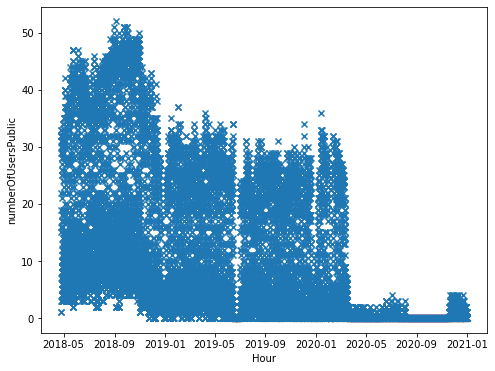

In [249]:
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Hour")
plt.ylabel("numberOfUsersPublic")
plt.show()

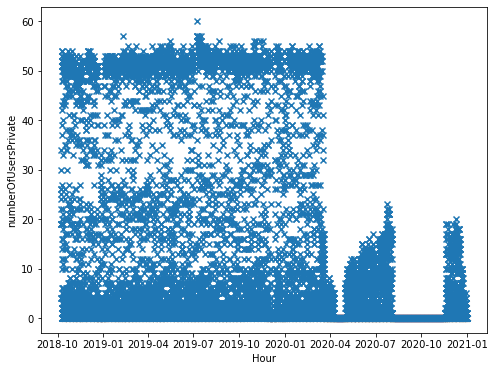

In [250]:
plt.figure(figsize = (8,6))
plt.scatter(Xpriv, Ypriv, marker="x")
plt.xlabel("Hour")
plt.ylabel("numberOfUsersPrivate")
plt.show()

In the second graph we can see that around July 2019, way more than 53 sessions(which is the max capacity) were running in the same hour. We did some research and found out that this could have been the cause of a big earthquake that was happening around that time in Los Angeles. The earthquake might have caused power outages and thus users might get disconnedted and reconnected. OLD

### Decision Tree

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [252]:
Xpu = public_sessions.drop(['numberOfUsers_public', 'Hour'], axis=1)
Xpr = private_sessions.drop(['numberOfUsers_private', 'Hour'], axis=1)

Ypu = public_sessions["numberOfUsers_public"]
Ypr = private_sessions["numberOfUsers_private"]

In [253]:
Xpu

,isWeekday,hourOfDay,dayOfMonth,month,year,temperature,precipitation
3,True,3.0,25.0,4.0,2018.0,12.0,0.0
4,True,4.0,25.0,4.0,2018.0,12.0,0.0
5,True,5.0,25.0,4.0,2018.0,12.0,0.0
6,True,6.0,25.0,4.0,2018.0,12.0,0.0
7,True,7.0,25.0,4.0,2018.0,12.0,0.0
...,...,...,...,...,...,...,...
23564,True,20.0,31.0,12.0,2020.0,13.0,0.0
23565,True,21.0,31.0,12.0,2020.0,12.0,0.0
23566,True,22.0,31.0,12.0,2020.0,12.0,0.0
23567,True,23.0,31.0,12.0,2020.0,11.0,0.0


### Train-Test-Split

In [328]:
#Data split

# Split the data into training and testing sets
X_train_public, X_test_public, y_train_public, y_test_public = train_test_split(Xpu, Ypu, test_size=0.3, random_state=42)
X_train_private, X_test_private, y_train_private, y_test_private = train_test_split(Xpr, Ypr, test_size=0.3, random_state=41)

In [329]:
#For PUBLIC site

# Create a Decision Tree Regressor
public_regressor = DecisionTreeRegressor(max_depth=4)

# Fit the model on the training data
public_regressor.fit(X_train_public, y_train_public)

# Make predictions on the test set
y_pred_public = public_regressor.predict(X_test_public)

# Evaluate the model
mse = mean_squared_error(y_test_public, y_pred_public)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 36.343437679698596
Root Mean Squared Error: 6.028551872522836


In [330]:
print(Xpu)

      isWeekday  hourOfDay  dayOfMonth  month    year  temperature  \
3          True        3.0        25.0    4.0  2018.0         12.0   
4          True        4.0        25.0    4.0  2018.0         12.0   
5          True        5.0        25.0    4.0  2018.0         12.0   
6          True        6.0        25.0    4.0  2018.0         12.0   
7          True        7.0        25.0    4.0  2018.0         12.0   
...         ...        ...         ...    ...     ...          ...   
23564      True       20.0        31.0   12.0  2020.0         13.0   
23565      True       21.0        31.0   12.0  2020.0         12.0   
23566      True       22.0        31.0   12.0  2020.0         12.0   
23567      True       23.0        31.0   12.0  2020.0         11.0   
23568      True        0.0         1.0    1.0  2021.0         10.0   

       precipitation  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
...              ... 

In [331]:
print(Xpr)

      isWeekday  hourOfDay  dayOfMonth  month    year  temperature  \
5          True        5.0         8.0   10.0  2018.0         14.0   
6          True        6.0         8.0   10.0  2018.0         13.0   
7          True        7.0         8.0   10.0  2018.0         15.0   
8          True        8.0         8.0   10.0  2018.0         17.0   
9          True        9.0         8.0   10.0  2018.0         18.0   
...         ...        ...         ...    ...     ...          ...   
19580      True       20.0        31.0   12.0  2020.0         13.0   
19581      True       21.0        31.0   12.0  2020.0         12.0   
19582      True       22.0        31.0   12.0  2020.0         12.0   
19583      True       23.0        31.0   12.0  2020.0         11.0   
19584      True        0.0         1.0    1.0  2021.0         10.0   

       precipitation  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0  
...              ... 

In [332]:
# Visualizing the decision tree structure
import graphviz
from sklearn.tree import export_graphviz  

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(public_regressor, out_file ='tree_structure_public.dot', 
               feature_names = ['isWeekday', 'hourOfDay', 'dayOfMonth', 'month', 'year', 'temperature', 'precipitation'])

In [333]:
cv_scores_public_dt = cross_val_score(public_regressor, X_train_public, y_train_public, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores_pub = np.sqrt(-cv_scores_public_dt)

# Display cross-validation scores
print("Cross Validation Scores(RMSE):", rmse_scores_pub)
print("Average CV Score(RMSE):", np.mean(rmse_scores_pub))
print("Number of CV Scores used in Average:", len(rmse_scores_pub))

Cross Validation Scores(RMSE): [5.73373832 6.12148236 5.78809222 5.82608876 6.04294756 6.00799013
 6.18728    5.66897583 5.9170786  5.86327331]
Average CV Score(RMSE): 5.915694709582308
Number of CV Scores used in Average: 10


In [334]:
#For PRIVATE site
# Create a Decision Tree Regressor
private_regressor = DecisionTreeRegressor(max_depth=4)

# Fit the model on the training data
private_regressor.fit(X_train_private, y_train_private)

# Make predictions on the test set
y_pred_private = private_regressor.predict(X_test_private)

# Evaluate the model
mse = mean_squared_error(y_test_private, y_pred_private)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 99.16905589096771
Root Mean Squared Error: 9.958366125573397


In [335]:
# Visualizing the decision tree structure
import graphviz
from sklearn.tree import export_graphviz  

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(private_regressor, out_file ='tree_structure_private.dot', 
               feature_names = ['isWeekday', 'hourOfDay', 'dayOfMonth', 'month', 'year', 'temperature', 'precipitation'])

In [336]:
cv_scores_private_dt = cross_val_score(private_regressor, X_train_private, y_train_private, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores_priv = np.sqrt(-cv_scores_private_dt)

# Display cross-validation scores
print("Cross Validation Scores(RMSE):", rmse_scores_priv)
print("Average CV Score(RMSE):", np.mean(rmse_scores_priv))
print("Number of CV Scores used in Average:", len(rmse_scores_priv))

Cross Validation Scores(RMSE): [ 9.63338624  9.88409814  9.56086328  9.61346363 11.22765452 10.09068062
 10.06338611 10.30446641 10.03545458  9.74396197]
Average CV Score(RMSE): 10.015741549509034
Number of CV Scores used in Average: 10


### Neural Networks

In [262]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [263]:
import tensorflow as tf


In [264]:
##import libraries
from tensorflow import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Public site ANN

In [337]:
#normalize training data
st_scaler = StandardScaler()
st_scaler.fit(X_train_public)
X_train_scaled_public = st_scaler.transform(X_train_public)

In [338]:
#Initializing the ANN
model_public = Sequential(
    [Dense(64, activation="relu", input_shape=[X_train_public.shape[1]]),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
     Dense(1,activation="relu")])

In [339]:
# Compiling the ANN

model_public.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [340]:
model_public.summary()

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_356 (Dense)           (None, 64)                512       
                                                                 
 dense_357 (Dense)           (None, 32)                2080      
                                                                 
 dense_358 (Dense)           (None, 16)                528       
                                                                 
 dense_359 (Dense)           (None, 1)                 17        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [341]:
epochs = 20

history = model_public.fit(X_train_scaled_public, y_train_public.values,
                   epochs=epochs, validation_split=0.3)

Epoch 1/20
361/361 [==============================] - 1s 1ms/step - loss: 78.3512 - mae: 5.5043 - mse: 78.3512 - val_loss: 36.3348 - val_mae: 3.7438 - val_mse: 36.3348
Epoch 2/20
361/361 [==============================] - 0s 922us/step - loss: 26.0739 - mae: 3.1232 - mse: 26.0739 - val_loss: 21.8527 - val_mae: 2.7596 - val_mse: 21.8527
Epoch 3/20
361/361 [==============================] - 0s 920us/step - loss: 20.0697 - mae: 2.6521 - mse: 20.0697 - val_loss: 19.0482 - val_mae: 2.4867 - val_mse: 19.0482
Epoch 4/20
361/361 [==============================] - 0s 992us/step - loss: 18.3969 - mae: 2.4722 - mse: 18.3969 - val_loss: 18.0731 - val_mae: 2.3906 - val_mse: 18.0731
Epoch 5/20
361/361 [==============================] - 0s 867us/step - loss: 17.3723 - mae: 2.3843 - mse: 17.3723 - val_loss: 17.2672 - val_mae: 2.2964 - val_mse: 17.2672
Epoch 6/20
361/361 [==============================] - 0s 884us/step - loss: 16.4939 - mae: 2.3034 - mse: 16.4939 - val_loss: 16.5329 - val_mae: 2.2334 -

In [342]:
model_public.predict(X_train_scaled_public[:])

array([[ 0.       ],
       [27.116259 ],
       [ 5.8395205],
       ...,
       [21.871222 ],
       [ 7.5389733],
       [ 1.9768128]], dtype=float32)

In [343]:
history_df_public = pd.DataFrame(history.history)
history_df_public

,loss,mae,mse,val_loss,val_mae,val_mse
0,78.351219,5.504296,78.351219,36.334785,3.743845,36.334785
1,26.073870,3.123152,26.073870,21.852655,2.759614,21.852655
2,20.069733,2.652120,20.069733,19.048159,2.486655,19.048159
3,18.396879,2.472164,18.396879,18.073074,2.390595,18.073074
4,17.372301,2.384320,17.372301,17.267174,2.296413,17.267174
5,16.493916,2.303388,16.493916,16.532913,2.233385,16.532913
6,15.787539,2.240639,15.787539,16.403517,2.243644,16.403517
7,15.432055,2.211711,15.432055,15.025974,2.108974,15.025974
8,15.104153,2.190328,15.104153,14.545917,2.065305,14.545917
9,14.386496,2.136424,14.386496,14.383566,2.058743,14.383566


In [344]:
root_metrics_df = history_df_public[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,8.851622,6.027834
1,5.106258,4.674682
2,4.479926,4.364420
3,4.289158,4.251244
4,4.168009,4.155379
5,4.061270,4.066069
6,3.973354,4.050126
7,3.928365,3.876335
8,3.886406,3.813911
9,3.792953,3.792567


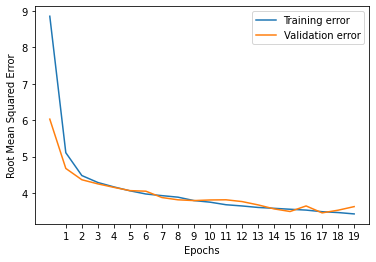

In [345]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [346]:
# Prediction on test set

X_test_scaled_public = st_scaler.transform(X_test_public)
y_pred_public = model_public.predict(X_test_scaled_public)

In [347]:
# Report regression performance on test set

from sklearn.metrics import mean_squared_error, mean_absolute_error


print("RMSE: ", np.sqrt(mean_squared_error(y_test_public, y_pred_public)))
print("MAE: ", mean_absolute_error(y_test_public, y_pred_public))

RMSE:  3.654708184646215
MAE:  2.063578674736758


In [348]:
def baseline_model():
 # create model
    model = Sequential(
    [Dense(64, activation="relu", input_shape=[X_train_public.shape[1]]),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1,activation="relu")])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [351]:
estimator = KerasRegressor(model=baseline_model, epochs=20, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train_scaled_public, y_train_public, cv=kfold, scoring='neg_mean_squared_error')

In [363]:
print("Cross Validation Scores public: ", -1*results)
print("Average CV Score: ", -1*results.mean())
print("Number of CV Scores used in Average: ", len(results))

Cross Validation Scores public:  [ 7.69247113  9.85265398  8.61561111 11.41965377 10.92409425 10.08067484
 13.07667675 10.06425828  9.09038903  9.62835366]
Average CV Score:  10.04448367959974
Number of CV Scores used in Average:  10


### Nice scores!

### Private site Neural Network

In [364]:
#normalize training data
st_scaler = StandardScaler()
st_scaler.fit(X_train_private)
X_train_scaled_private = st_scaler.transform(X_train_private)

In [365]:
#Initializing the ANN
model_private = Sequential(
    [Dense(128, activation="relu", input_shape=[X_train_private.shape[1]]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
     Dense(1, activation = 'relu')])

In [366]:
# Compiling the ANN

model_private.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [367]:
model_private.summary()

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_440 (Dense)           (None, 128)               1024      
                                                                 
 dense_441 (Dense)           (None, 64)                8256      
                                                                 
 dense_442 (Dense)           (None, 32)                2080      
                                                                 
 dense_443 (Dense)           (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [368]:
epochs = 20

history = model_private.fit(X_train_scaled_private, y_train_private.values,
                   epochs=epochs, validation_split=0.3)

Epoch 1/20
300/300 [==============================] - 1s 1ms/step - loss: 188.7224 - mae: 8.2665 - mse: 188.7224 - val_loss: 91.8403 - val_mae: 5.0923 - val_mse: 91.8403
Epoch 2/20
300/300 [==============================] - 0s 947us/step - loss: 79.3180 - mae: 4.6258 - mse: 79.3180 - val_loss: 75.1637 - val_mae: 4.4533 - val_mse: 75.1637
Epoch 3/20
300/300 [==============================] - 0s 937us/step - loss: 68.3453 - mae: 4.1609 - mse: 68.3453 - val_loss: 74.1451 - val_mae: 4.2300 - val_mse: 74.1451
Epoch 4/20
300/300 [==============================] - 0s 930us/step - loss: 65.8029 - mae: 4.0057 - mse: 65.8029 - val_loss: 71.1809 - val_mae: 4.1384 - val_mse: 71.1809
Epoch 5/20
300/300 [==============================] - 0s 920us/step - loss: 64.1693 - mae: 3.9523 - mse: 64.1693 - val_loss: 68.7496 - val_mae: 4.1560 - val_mse: 68.7496
Epoch 6/20
300/300 [==============================] - 0s 930us/step - loss: 60.2643 - mae: 3.8273 - mse: 60.2643 - val_loss: 66.6744 - val_mae: 4.1238

In [369]:
model_private.predict(X_train_scaled_private[:])

array([[6.4591975],
       [0.       ],
       [8.446883 ],
       ...,
       [0.       ],
       [0.       ],
       [0.       ]], dtype=float32)

In [370]:
history_df_private = pd.DataFrame(history.history)
history_df_private

,loss,mae,mse,val_loss,val_mae,val_mse
0,188.722397,8.266482,188.722397,91.840302,5.092293,91.840302
1,79.317955,4.625820,79.317955,75.163666,4.453322,75.163666
2,68.345329,4.160910,68.345329,74.145088,4.230015,74.145088
3,65.802940,4.005730,65.802940,71.180908,4.138446,71.180908
4,64.169334,3.952348,64.169334,68.749557,4.156016,68.749557
5,60.264278,3.827252,60.264278,66.674400,4.123837,66.674400
6,59.116451,3.768348,59.116451,68.038307,3.959383,68.038307
7,56.894634,3.686435,56.894634,69.997734,3.900497,69.997734
8,56.370876,3.634775,56.370876,65.167725,3.943079,65.167725
9,55.227734,3.617740,55.227734,62.555813,3.791334,62.555813


In [371]:
root_metrics_df = history_df_private[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,13.737627,9.583335
1,8.906063,8.669698
2,8.267123,8.610754
3,8.111901,8.436878
4,8.010576,8.291535
5,7.763007,8.165439
6,7.688722,8.248534
7,7.542853,8.366465
8,7.508054,8.072653
9,7.431536,7.909223


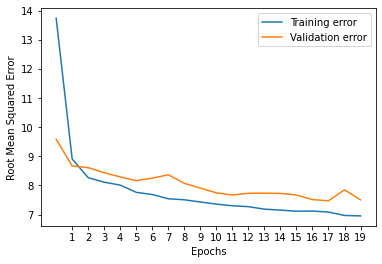

In [372]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [373]:
# Prediction on test set

X_test_scaled_private = st_scaler.transform(X_test_private)
y_pred_private = model_private.predict(X_test_scaled_private)

In [374]:
# Report regression performance on test set

from sklearn.metrics import mean_squared_error, mean_absolute_error


print("RMSE: ", np.sqrt(mean_squared_error(y_test_private, y_pred_private)))
print("MAE: ", mean_absolute_error(y_test_private, y_pred_private))

RMSE:  6.948407960678432
MAE:  3.1862910969102307


In [378]:
def baseline_model2():
 # create model
    model = Sequential(
    [Dense(128, activation="relu", input_shape=[X_train_public.shape[1]]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1,activation="relu")])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [379]:
estimator = KerasRegressor(model=baseline_model2, epochs=20, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
results2 = cross_val_score(estimator, X_train_scaled_private, y_train_private, cv=kfold, scoring='neg_mean_squared_error')

In [380]:
print("Cross Validation Scores Private: ", -1*results2)
print("Average CV Score: ", -1*results2.mean())
print("Number of CV Scores used in Average: ", len(results2))

Cross Validation Scores Private:  [40.73557647 42.95554977 38.06686242 44.83533419 48.93382497 50.71967405
 42.99311393 46.06000619 56.81918237 43.14200511]
Average CV Score:  45.5261129453697
Number of CV Scores used in Average:  10
